In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings 
warnings.filterwarnings('ignore')

### Récupération des données d'entraînement

In [2]:
files = [file for file in os.listdir("../src/StreamLitpyCrypto/assets/best_models/datas/BestMarkowitz/full/cryptos")]
for file in files:
    print(file)
files2 = [file2 for file2 in os.listdir("../src/StreamLitpyCrypto/assets/best_models/datas/BestMarkowitz/full/nasdaq")]
for file2 in files2:
    print(file2)

année_2019_full_DF.csv
année_2021_full_DF.csv
année_2018_full_DF.csv
année_2017_full_DF.csv
année_2020_full_DF.csv
année_2019_full_DF.csv
année_2021_full_DF.csv
année_2018_full_DF.csv
année_2017_full_DF.csv
année_2020_full_DF.csv


In [3]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("../src/StreamLitpyCrypto/assets/best_models/datas/BestMarkowitz/full/cryptos/"+file, index_col = [0])
    all_data = pd.concat([all_data, df])
for file2 in files2:
    df = pd.read_csv("../src/StreamLitpyCrypto/assets/best_models/datas/BestMarkowitz/full/nasdaq/"+file2, index_col = [0])
    all_data = pd.concat([all_data, df])
all_data = all_data.reset_index()
all_data = all_data.drop(['index'], axis = 1)

In [4]:
all_data

,algo,close_volatility,close_range,vol_volatility,vol_range,market,nbr_of_cryptos_tweets,nbr_of_nasdaq_tweets,Volatility_Gold_Close,Volatility_Gold_Vol,...,Range_Gold_Vol,Range_Oil_Close,Range_Oil_Vol,Range_Gas_Close,Range_Gas_Vol,Mean_FED,Mean_PMI,Mean_Unemploy,Volatility_VIX,Range_VIX
0,BestMarkowitz,0.037712,33.082545,0.221889,3.901255e+08,cryptos,118.0,4.0,0.005055,2.010917,...,147,5.050003,21551,0.104,51606,2.40,53.600000,4.000000,0.091686,4.070002
1,?,0.071440,65.817556,0.383816,6.228403e+08,cryptos,158.0,5.0,0.002744,0.987214,...,95,2.959999,7748,0.624,103334,2.40,53.600000,4.000000,0.038497,2.279999
2,BestMarkowitz,0.025261,20.250341,0.197617,2.551500e+08,cryptos,110.0,8.0,0.003801,0.916978,...,8,2.060001,9689,0.117,33885,2.40,53.600000,4.000000,0.025405,1.240002
3,BestMarkowitz,0.030543,18.643759,0.180910,4.505343e+08,cryptos,123.0,5.0,0.006116,2.128914,...,53,1.709999,23340,0.267,137340,2.40,53.600000,4.000000,0.057421,3.379999
4,BestMarkowitz,0.028794,10.254283,0.185187,2.741435e+08,cryptos,129.0,5.0,0.003523,1.274377,...,212932,1.189999,34737,0.290,71662,2.40,54.342857,3.885714,0.032933,3.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,BestMarkowitz,0.019089,13.008535,0.329128,1.160672e+07,nasdaq,249.0,3.0,0.005186,1.679233,...,270,1.560001,15189,0.339,78653,0.09,53.400000,6.700000,0.054710,2.900000
431,BestMarkowitz,0.016557,12.523288,0.611900,1.349588e+07,nasdaq,225.0,7.0,0.008402,2.239722,...,205695,4.410000,34854,0.304,121182,0.09,53.400000,6.700000,0.021020,3.130001
432,BestMarkowitz,0.016455,11.250576,0.301014,7.505765e+06,nasdaq,275.0,2.0,0.009733,1.032689,...,1738,1.639999,12638,0.481,131898,0.09,56.700000,6.700000,0.032232,1.590000
433,BestMarkowitz,0.014916,12.127458,0.451083,1.924668e+07,nasdaq,288.0,4.0,0.007514,0.736732,...,981,2.289997,6848,0.147,93776,0.09,56.700000,6.700000,0.040619,3.150000


### Etude exploratoire et statistique

#### Dans cette partie on va essayer de mieux voire les relations entre nos variables et leurs répartition 

In [7]:
all_data['algo'].value_counts(normalize=True)

BestMarkowitz    0.873563
?                0.126437
Name: algo, dtype: float64

In [5]:
all_data['market'] = all_data['market'].replace({"nasdaq": 0, "cryptos": 1})

In [6]:
all_data['algo'] = all_data['algo'].replace({"?": 0, "BestMarkowitz": 1})

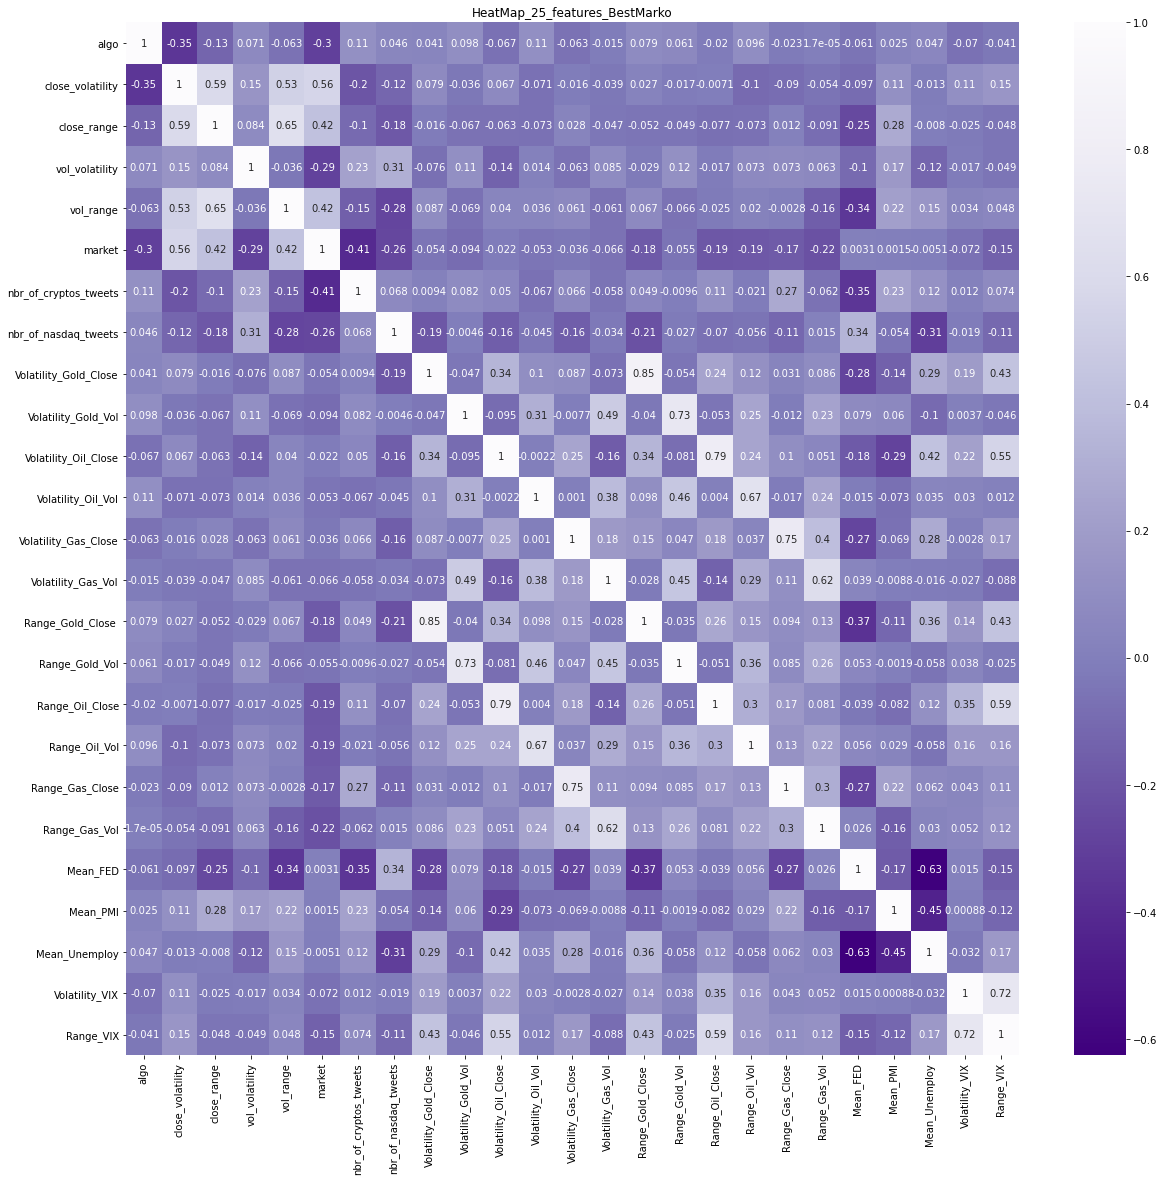

In [29]:
plt.figure(figsize=(20,19))
sns.heatmap(all_data.corr(), annot = True, cmap = "Purples_r")
plt.title('HeatMap_25_features_BestMarko')
plt.savefig('../src/StreamLitpyCrypto/assets/best_models/graphs/HeatMap_25_features_BestMarko.jpg')

#### Il y'a pas mal de corrélation négligable entre nos variables et la variable cible, faisons alors une première sélection

In [27]:
all_data_kbested = all_data[['algo', 'close_volatility', 'close_range', 'vol_volatility', 'vol_range',
       'nbr_of_cryptos_tweets', 'nbr_of_nasdaq_tweets',
       'Volatility_Gold_Close', 'Volatility_Gold_Vol',
       'Volatility_Oil_Close', 'Volatility_Oil_Vol',
       'Volatility_Gas_Close', 'Range_Gold_Close ', 'Range_Gold_Vol',
       'Range_Oil_Vol', 'Range_Gas_Close', 'Mean_FED', 'Mean_PMI',
       'Mean_Unemploy', 'Volatility_VIX', 'Range_VIX']]

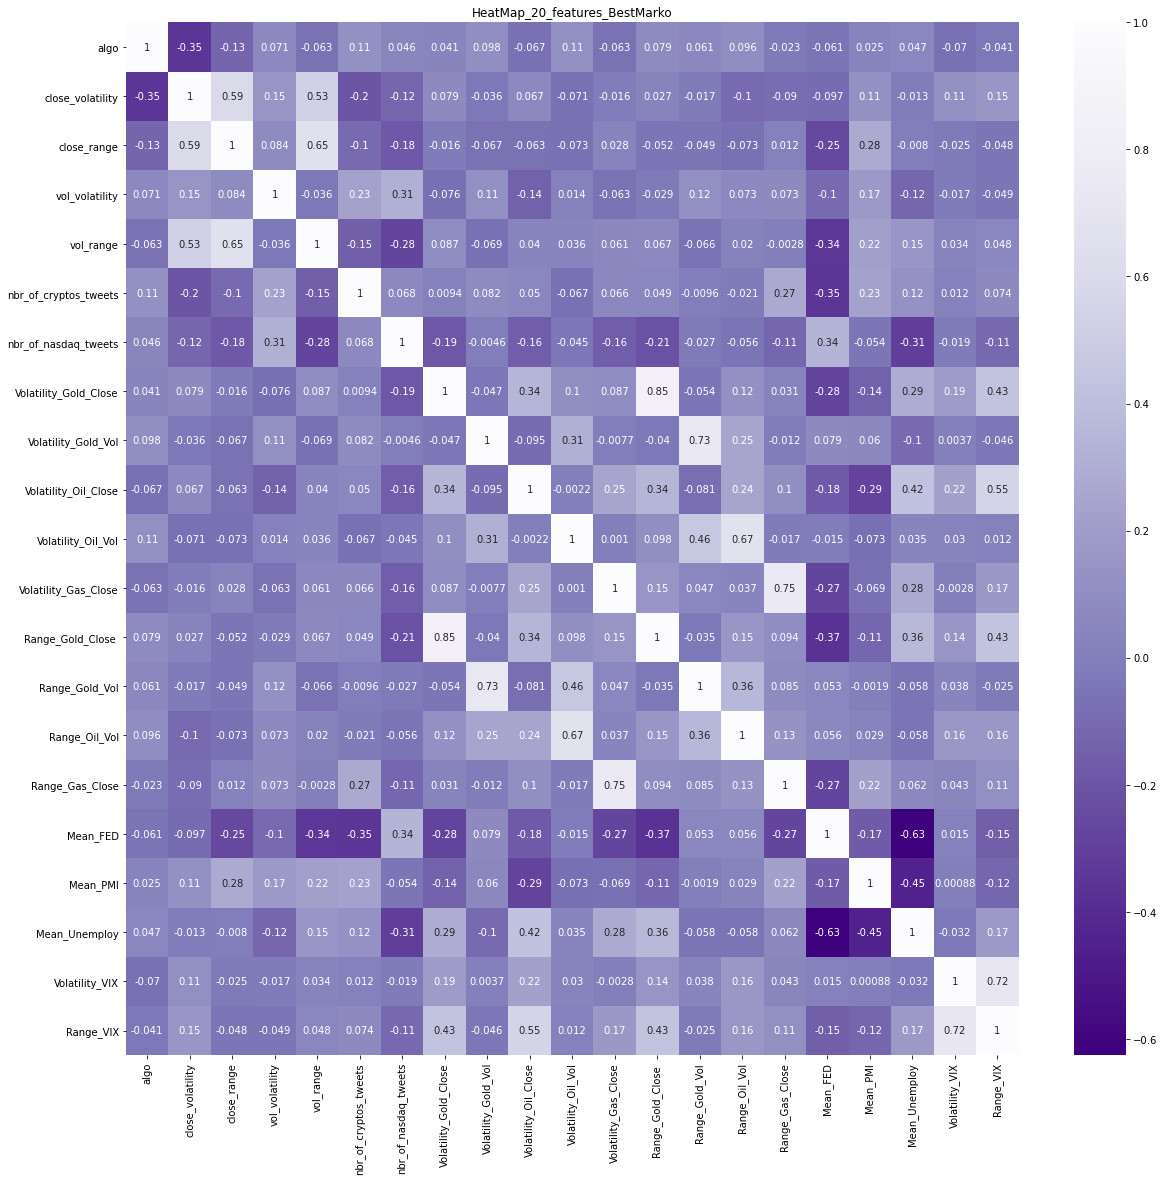

In [30]:
plt.figure(figsize=(20,19))
sns.heatmap(all_data_kbested.corr(), annot = True, cmap = "Purples_r")
plt.title('HeatMap_20_features_BestMarko')
plt.savefig('../src/StreamLitpyCrypto/assets/best_models/graphs/HeatMap_20_features_BestMarko.jpg')

In [14]:
all_data['algo'][all_data['market']==1].value_counts(normalize = True)

1    0.791506
0    0.208494
Name: algo, dtype: float64

In [15]:
all_data['algo'][all_data['market']==0].value_counts(normalize = True)

1    0.994318
0    0.005682
Name: algo, dtype: float64

In [ ]:
# Il faut donc supprimer market car une seule valeur '?' pour le nasdaq

In [16]:
all_data = all_data.drop(['market'], axis =1)

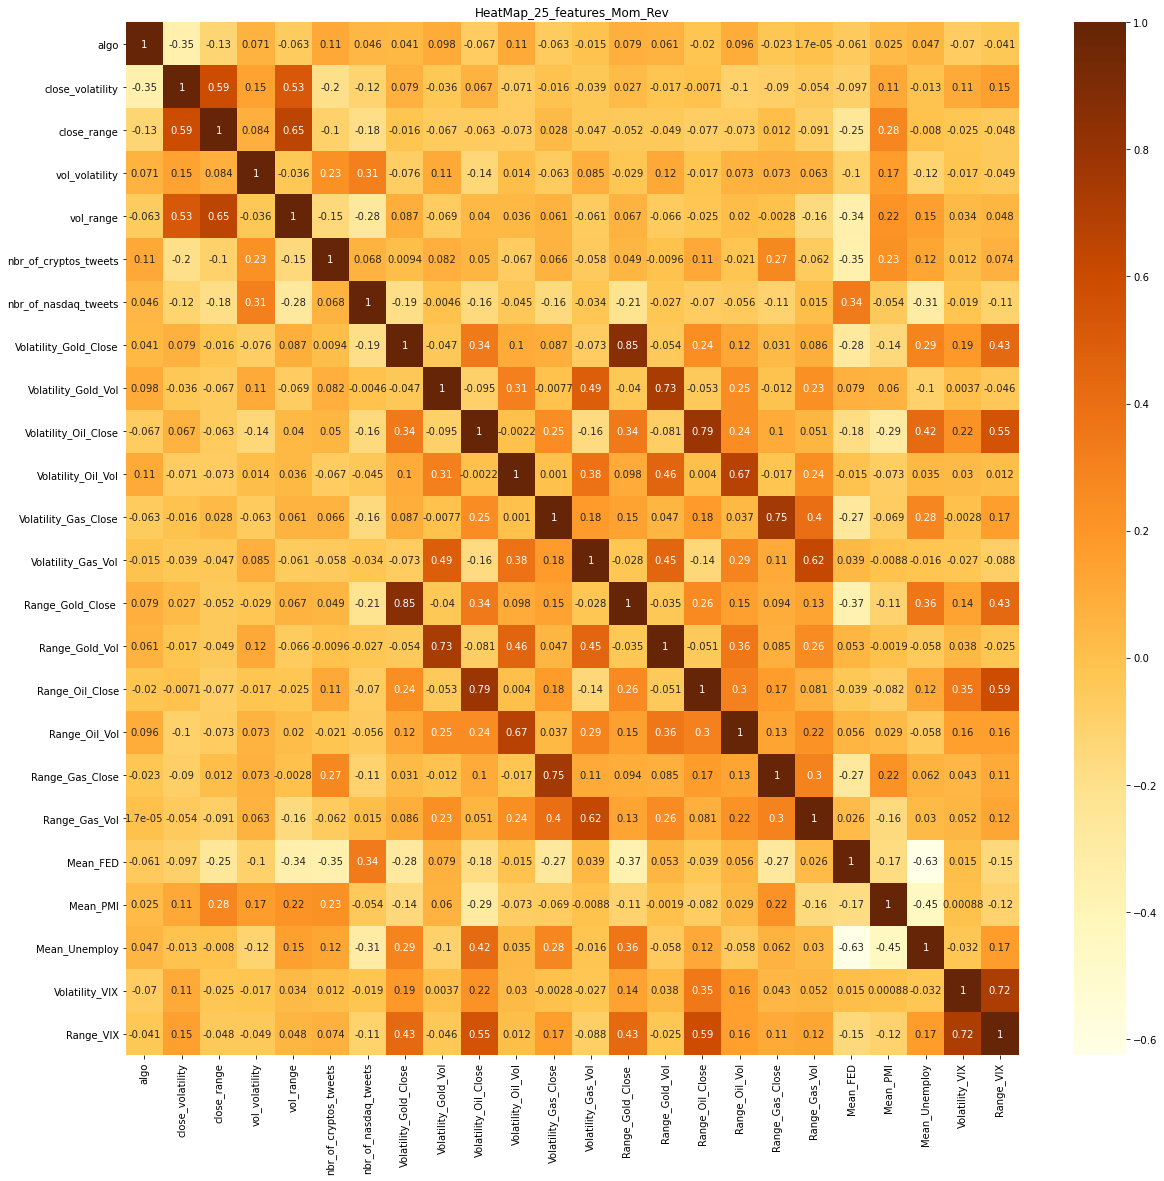

In [17]:
plt.figure(figsize=(20,19))
sns.heatmap(all_data.corr(), annot = True, cmap = "YlOrBr")
plt.title('HeatMap_25_features_Mom_Rev')
plt.savefig('../src/StreamLitpyCrypto/assets/best_models/graphs/HeatMap_25_features_Mom_Rev.jpg')

In [18]:
X = all_data.drop(['algo'], axis = 1)
y = all_data['algo']

<AxesSubplot:xlabel='close_volatility', ylabel='close_range'>

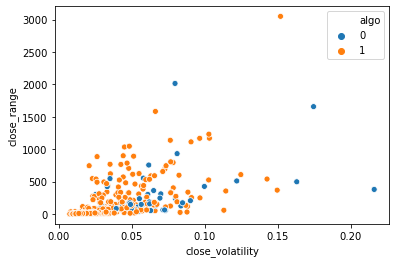

In [19]:
sns.scatterplot(x = 'close_volatility', y ='close_range', hue = y, data = all_data)

<AxesSubplot:xlabel='close_volatility', ylabel='Volatility_Oil_Vol'>

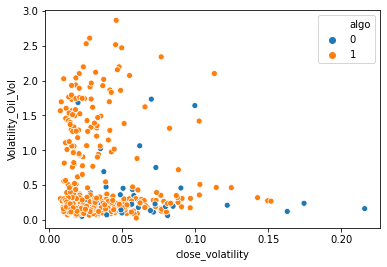

In [23]:
sns.scatterplot(x = 'close_volatility', y ='Volatility_Oil_Vol', hue = y, data = all_data)

### Entraînement

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#### Normalisation de nos données

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [51]:
knn.score(X_test_scaled, y_test)

0.8625954198473282

In [52]:
y_pred = knn.predict(X_test_scaled)

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  0  18]
 [  0 113]]


### Regression logistique

In [54]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(scoring = 'precision')
lr.fit(X_train_scaled, y_train)

LogisticRegressionCV(scoring='precision')

In [55]:
lr.score(X_test_scaled, y_test)

0.8617886178861789

In [56]:
y_pred = lr.predict(X_test_scaled)

In [57]:
print(confusion_matrix(y_test, y_pred))

[[  1  17]
 [  7 106]]


### Forêt aléatoire

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [59]:
rfc.score(X_test_scaled, y_test)

0.8549618320610687

In [60]:
y_pred = rfc.predict(X_test_scaled)

In [61]:
print(confusion_matrix(y_test, y_pred))

[[  1  17]
 [  2 111]]


### Support vector machine

In [62]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [64]:
svm.score(X_test_scaled, y_test)

0.8625954198473282

In [67]:
y_pred = svm.predict(X_test_scaled)
y_pred = svm.predict(X_test_scaled)

In [68]:
print(confusion_matrix(y_test, y_pred))

[[  0  18]
 [  0 113]]


In [76]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
def evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Confusion_matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print("Cassification_report : ")
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = "f1", train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis= 1), label = 'train score')
    plt.xlabel("Data Set %")
    plt.plot(N, val_score.mean(axis= 1), label = 'val score')
    plt.ylabel('accuracy')
    plt.title("Dagobert")
    plt.legend()
    plt.show()

Confusion_matrix : 
[[  0  18]
 [  0 113]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.86      1.00      0.93       113

    accuracy                           0.86       131
   macro avg       0.43      0.50      0.46       131
weighted avg       0.74      0.86      0.80       131



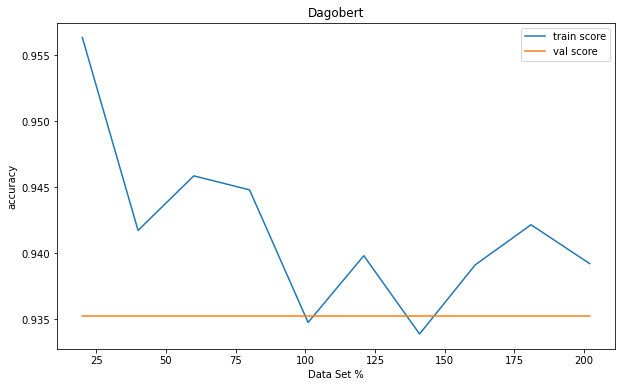

In [77]:
evaluate(X_train_scaled, X_test_scaled, y_train, y_test, svm)

Confusion_matrix : 
[[  0  18]
 [  0 113]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.86      1.00      0.93       113

    accuracy                           0.86       131
   macro avg       0.43      0.50      0.46       131
weighted avg       0.74      0.86      0.80       131



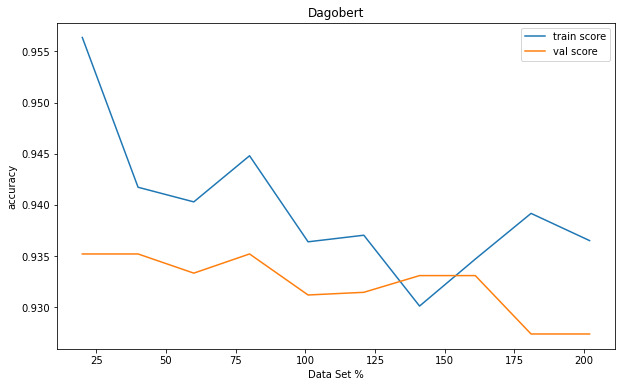

In [78]:
evaluate(X_train_scaled, X_test_scaled, y_train, y_test, knn)

### Adaboost classifier

Confusion_matrix : 
[[  5  13]
 [ 10 103]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.33      0.28      0.30        18
           1       0.89      0.91      0.90       113

    accuracy                           0.82       131
   macro avg       0.61      0.59      0.60       131
weighted avg       0.81      0.82      0.82       131



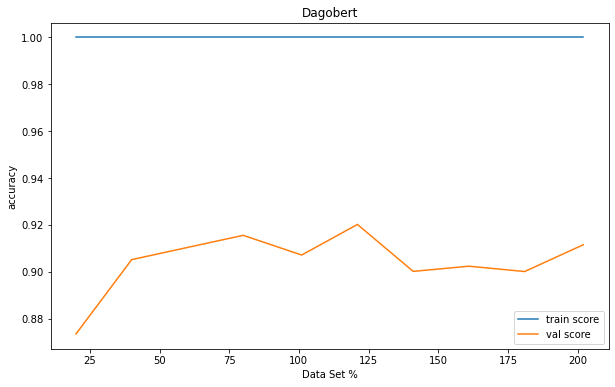

In [79]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
evaluate(X_train_scaled, X_test_scaled, y_train, y_test, abc)

In [81]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_scaled, y_train)
y_pred_train = abc.predict(X_train_scaled)
y_pred_test = abc.predict(X_test_scaled)
print(classification_report(y_pred_train, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      1.00      1.00       268

    accuracy                           1.00       304
   macro avg       0.99      1.00      0.99       304
weighted avg       1.00      1.00      1.00       304

              precision    recall  f1-score   support

           0       0.28      0.33      0.30        15
           1       0.91      0.89      0.90       116

    accuracy                           0.82       131
   macro avg       0.59      0.61      0.60       131
weighted avg       0.84      0.82      0.83       131



### Séléction des variables pertinentes

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 20)
X_15 = selector.fit_transform(X, y)
selector.get_feature_names_out()
X_15 = pd.DataFrame(X_15, columns=selector.get_feature_names_out())
X_15

,close_volatility,close_range,vol_volatility,vol_range,nbr_of_cryptos_tweets,nbr_of_nasdaq_tweets,Volatility_Gold_Close,Volatility_Gold_Vol,Volatility_Oil_Close,Volatility_Oil_Vol,Volatility_Gas_Close,Range_Gold_Close,Range_Gold_Vol,Range_Oil_Vol,Range_Gas_Close,Mean_FED,Mean_PMI,Mean_Unemploy,Volatility_VIX,Range_VIX
0,0.037712,33.082545,0.221889,3.901255e+08,118.0,4.0,0.005055,2.010917,0.018720,0.300756,0.021285,13.500000,147.0,21551.0,0.104,2.40,53.600000,4.000000,0.091686,4.070002
1,0.071440,65.817556,0.383816,6.228403e+08,158.0,5.0,0.002744,0.987214,0.024780,0.113293,0.059219,6.100098,95.0,7748.0,0.624,2.40,53.600000,4.000000,0.038497,2.279999
2,0.025261,20.250341,0.197617,2.551500e+08,110.0,8.0,0.003801,0.916978,0.010448,0.118582,0.018021,10.299927,8.0,9689.0,0.117,2.40,53.600000,4.000000,0.025405,1.240002
3,0.030543,18.643759,0.180910,4.505343e+08,123.0,5.0,0.006116,2.128914,0.012614,0.192158,0.044614,23.300049,53.0,23340.0,0.267,2.40,53.600000,4.000000,0.057421,3.379999
4,0.028794,10.254283,0.185187,2.741435e+08,129.0,5.0,0.003523,1.274377,0.004203,1.736169,0.014791,11.500000,212932.0,34737.0,0.290,2.40,54.342857,3.885714,0.032933,3.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.019089,13.008535,0.329128,1.160672e+07,249.0,3.0,0.005186,1.679233,0.012442,0.126570,0.040165,26.600098,270.0,15189.0,0.339,0.09,53.400000,6.700000,0.054710,2.900000
431,0.016557,12.523288,0.611900,1.349588e+07,225.0,7.0,0.008402,2.239722,0.015234,0.966706,0.016964,96.900024,205695.0,34854.0,0.304,0.09,53.400000,6.700000,0.021020,3.130001
432,0.016455,11.250576,0.301014,7.505765e+06,275.0,2.0,0.009733,1.032689,0.007514,0.174901,0.045007,56.700073,1738.0,12638.0,0.481,0.09,56.700000,6.700000,0.032232,1.590000
433,0.014916,12.127458,0.451083,1.924668e+07,288.0,4.0,0.007514,0.736732,0.006407,0.114856,0.016192,58.500000,981.0,6848.0,0.147,0.09,56.700000,6.700000,0.040619,3.150000


In [106]:
X_15_train, X_15_test, y_train, y_test = train_test_split(X_15, y, test_size=0.3, random_state=42)

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_15_train_scaled = scaler.fit_transform(X_15_train)
X_15_test_scaled = scaler.transform(X_15_test)

In [108]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_15_train_scaled, y_train)
y_pred_train = abc.predict(X_15_train_scaled)
y_pred_test = abc.predict(X_15_test_scaled)
print(classification_report(y_pred_train, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       267

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304

              precision    recall  f1-score   support

           0       0.28      0.50      0.36        10
           1       0.96      0.89      0.92       121

    accuracy                           0.86       131
   macro avg       0.62      0.70      0.64       131
weighted avg       0.90      0.86      0.88       131



In [119]:
print(confusion_matrix(y_pred_test, y_test))

[[  5   5]
 [ 13 108]]


In [139]:
y_pred_test_treshold = abc.decision_function(X_15_test_scaled) > 0.4

In [150]:
y_pred_test_treshold

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True,

In [140]:
print(confusion_matrix(y_pred_test_treshold, y_test))

[[14 43]
 [ 4 70]]


In [142]:
print(classification_report(y_pred_test_treshold, y_test))

              precision    recall  f1-score   support

       False       0.78      0.25      0.37        57
        True       0.62      0.95      0.75        74

    accuracy                           0.64       131
   macro avg       0.70      0.60      0.56       131
weighted avg       0.69      0.64      0.59       131



In [147]:
selector.get_feature_names_out()

array(['close_volatility', 'close_range', 'vol_volatility', 'vol_range',
       'nbr_of_cryptos_tweets', 'nbr_of_nasdaq_tweets',
       'Volatility_Gold_Close', 'Volatility_Gold_Vol',
       'Volatility_Oil_Close', 'Volatility_Oil_Vol',
       'Volatility_Gas_Close', 'Range_Gold_Close ', 'Range_Gold_Vol',
       'Range_Oil_Vol', 'Range_Gas_Close', 'Mean_FED', 'Mean_PMI',
       'Mean_Unemploy', 'Volatility_VIX', 'Range_VIX'], dtype=object)

In [145]:
from joblib import dump, load
scaler_filename = "../data/models/ML_PyCrypto_ABD_scaler.save"
dump(scaler, scaler_filename) 

# And now to load...

#scaler = joblib.load(scaler_filename)
import pickle
import os
os.makedirs(f'../data/models', exist_ok=True)
filename = '../data/models/ML_PyCrypto_ABD.pkl'
#enregistre le modèle
pickle.dump(abc, open(filename, 'wb'))
#charge le modèle
loaded_model = pickle.load(open(filename, 'rb'))

In [149]:
from joblib import dump, load

dump(abc, '../data/models/ML_PyCrypto_abc.joblib')

['../data/models/ML_PyCrypto_abc.joblib']